<a href="https://colab.research.google.com/github/esperonj/Equipo26/blob/main/50EyoloS_Avance4_26Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Montar Drive
from google.colab import drive
drive.mount('/content/drive')

# Librerías
import os
import random
import shutil

# Definir carpetas base
carpeta_base = '/content/drive/MyDrive'
carpeta_imagenes = os.path.join(carpeta_base, 'Labels')
carpeta_etiquetas = os.path.join(carpeta_base, 'train')

# Crear estructura de dataset para YOLO
yolo_path = '/content/yolo_dataset'
for split in ['train', 'val']:
    os.makedirs(os.path.join(yolo_path, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(yolo_path, 'labels', split), exist_ok=True)

# Listar imágenes y etiquetas
imagenes = sorted([f for f in os.listdir(carpeta_imagenes) if f.lower().endswith(('.jpg', '.png','.JPG'))])
etiquetas = sorted([f for f in os.listdir(carpeta_etiquetas) if f.endswith('.txt')])

# Emparejar imágenes con sus etiquetas
pares = [(img, img.rsplit('.', 1)[0] + '.txt') for img in imagenes if img.rsplit('.', 1)[0] + '.txt' in etiquetas]
random.shuffle(pares)

# Dividir en 80% train y 20% val
split_idx = int(0.8 * len(pares))
train_pares = pares[:split_idx]
val_pares = pares[split_idx:]

# Función para copiar archivos
def copiar_pares(pares, tipo):
    for img_file, label_file in pares:
        shutil.copy(os.path.join(carpeta_imagenes, img_file), os.path.join(yolo_path, 'images', tipo, img_file))
        shutil.copy(os.path.join(carpeta_etiquetas, label_file), os.path.join(yolo_path, 'labels', tipo, label_file))

copiar_pares(train_pares, 'train')
copiar_pares(val_pares, 'val')

# Crear archivo de configuración YAML
yaml_content = f"""
path: {yolo_path}
train: images/train
val: images/val
nc: 1
names: ['etiqueta']
"""

with open('/content/yolo_dataset/dataset.yaml', 'w') as f:
    f.write(yaml_content)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install ultralytics
from ultralytics import YOLO

# Entrenar modelo base nano
model = YOLO('yolov8s.pt')  # También puedes probar yolov8s.pt, yolov8m.pt, etc.
model.train(data='/content/yolo_dataset/dataset.yaml', epochs=50, imgsz=300,cache=True)


100%|██████████| 21.5M/21.5M [00:00<00:00, 141MB/s]


Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_dataset/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

train: Scanning /content/yolo_dataset/labels/train.cache... 236 images, 31 backgrounds, 0 corrupt: 100%|██████████| 236/236 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.1±0.2 ms, read: 118.8±43.7 MB/s, size: 1757.2 KB)



val: Scanning /content/yolo_dataset/labels/val.cache... 60 images, 4 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.123      1.636      1.257         58        416: 100%|██████████| 15/15 [04:01<00:00, 16.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.16s/it]

                   all         60         98      0.724      0.959       0.87      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G     0.7399     0.9092     0.9663         41        416: 100%|██████████| 15/15 [03:51<00:00, 15.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.85s/it]

                   all         60         98      0.827      0.959      0.898      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.7658     0.8162     0.9913         44        416: 100%|██████████| 15/15 [03:48<00:00, 15.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.62s/it]

                   all         60         98      0.567      0.765      0.696      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G     0.8143     0.7627      1.008         35        416: 100%|██████████| 15/15 [03:47<00:00, 15.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.29s/it]

                   all         60         98      0.483      0.765      0.645      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G     0.8179       0.76      1.042         27        416: 100%|██████████| 15/15 [03:45<00:00, 15.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.33s/it]

                   all         60         98      0.404      0.724       0.49      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.8418     0.7827      1.071         26        416: 100%|██████████| 15/15 [03:46<00:00, 15.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.37s/it]

                   all         60         98      0.435      0.765       0.61      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G     0.8126     0.7266      1.032         44        416: 100%|██████████| 15/15 [03:46<00:00, 15.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.26s/it]

                   all         60         98      0.435      0.644      0.582      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      0.801      0.707      1.029         35        416: 100%|██████████| 15/15 [03:45<00:00, 15.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.26s/it]

                   all         60         98      0.752      0.663      0.762      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.7818     0.6596      1.047         41        416: 100%|██████████| 15/15 [03:46<00:00, 15.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.32s/it]

                   all         60         98      0.598      0.571      0.553      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.8179     0.6529      1.046         34        416: 100%|██████████| 15/15 [03:46<00:00, 15.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.46s/it]

                   all         60         98      0.647      0.592      0.658      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.7361     0.6198      1.003         45        416: 100%|██████████| 15/15 [03:48<00:00, 15.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.32s/it]

                   all         60         98       0.39      0.194      0.188      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.7882     0.6335      1.036         33        416: 100%|██████████| 15/15 [03:45<00:00, 15.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.27s/it]

                   all         60         98      0.739      0.816      0.782      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.7388     0.5969       1.02         42        416: 100%|██████████| 15/15 [03:49<00:00, 15.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.63s/it]

                   all         60         98      0.775      0.633      0.724      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.7399     0.5542      1.001         41        416: 100%|██████████| 15/15 [03:52<00:00, 15.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.61s/it]

                   all         60         98      0.775      0.673      0.781      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.7393     0.5953      1.006         41        416: 100%|██████████| 15/15 [03:46<00:00, 15.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.74s/it]

                   all         60         98      0.821      0.844      0.877      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.6773     0.5406     0.9909         41        416: 100%|██████████| 15/15 [03:44<00:00, 14.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.25s/it]

                   all         60         98      0.904      0.963      0.968      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.6828     0.5486     0.9814         40        416: 100%|██████████| 15/15 [03:43<00:00, 14.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.25s/it]

                   all         60         98      0.897      0.898      0.935      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.6679     0.5328     0.9817         31        416: 100%|██████████| 15/15 [03:44<00:00, 14.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.29s/it]

                   all         60         98      0.918      0.867      0.915       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.6975      0.526      1.003         28        416: 100%|██████████| 15/15 [03:46<00:00, 15.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.16s/it]

                   all         60         98      0.907      0.908      0.944      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.6574     0.5344     0.9849         43        416: 100%|██████████| 15/15 [03:44<00:00, 14.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.97s/it]

                   all         60         98      0.867      0.908      0.942      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.6611     0.5224     0.9838         43        416: 100%|██████████| 15/15 [03:48<00:00, 15.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.90s/it]

                   all         60         98      0.927      0.907      0.958      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.6489     0.5003     0.9723         39        416: 100%|██████████| 15/15 [03:45<00:00, 15.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.63s/it]

                   all         60         98      0.893      0.949      0.958      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.6453     0.4991     0.9664         32        416: 100%|██████████| 15/15 [03:48<00:00, 15.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.21s/it]

                   all         60         98      0.841      0.974      0.924       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.6399     0.4761     0.9805         41        416: 100%|██████████| 15/15 [03:45<00:00, 15.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.18s/it]

                   all         60         98      0.862      0.954      0.953      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      0.644     0.4748     0.9733         37        416: 100%|██████████| 15/15 [03:44<00:00, 14.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.09s/it]

                   all         60         98      0.901      0.928      0.954      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.6097     0.4684     0.9559         48        416: 100%|██████████| 15/15 [03:44<00:00, 14.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.21s/it]

                   all         60         98      0.911      0.908      0.966       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.6253      0.471     0.9516         39        416: 100%|██████████| 15/15 [03:46<00:00, 15.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.58s/it]

                   all         60         98      0.903       0.95      0.976      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.6057     0.4782     0.9416         29        416: 100%|██████████| 15/15 [03:48<00:00, 15.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.39s/it]

                   all         60         98      0.893      0.949      0.957      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.5962     0.4786     0.9428         31        416: 100%|██████████| 15/15 [03:46<00:00, 15.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.39s/it]

                   all         60         98      0.892      0.939      0.956      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      0.619     0.4845       0.97         57        416: 100%|██████████| 15/15 [03:43<00:00, 14.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.21s/it]

                   all         60         98      0.895      0.918      0.953      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.6041      0.478     0.9544         46        416: 100%|██████████| 15/15 [03:45<00:00, 15.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.23s/it]

                   all         60         98      0.918      0.918      0.957      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.5721     0.4484     0.9483         33        416: 100%|██████████| 15/15 [03:45<00:00, 15.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.60s/it]

                   all         60         98      0.918      0.915      0.959      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      0.565     0.4142     0.9427         45        416: 100%|██████████| 15/15 [03:46<00:00, 15.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.23s/it]

                   all         60         98      0.911      0.939       0.96      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      0.563     0.4193     0.9293         32        416: 100%|██████████| 15/15 [03:43<00:00, 14.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.23s/it]

                   all         60         98      0.899      0.929      0.943      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      0.579     0.4333     0.9472         39        416: 100%|██████████| 15/15 [03:44<00:00, 14.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.19s/it]

                   all         60         98      0.915      0.908      0.945      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.5348     0.3962     0.9261         31        416: 100%|██████████| 15/15 [03:44<00:00, 14.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.89s/it]

                   all         60         98       0.93      0.939      0.954      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.5292      0.405     0.9359         28        416: 100%|██████████| 15/15 [03:45<00:00, 15.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.56s/it]

                   all         60         98      0.895      0.959      0.949      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.5231        0.4      0.925         35        416: 100%|██████████| 15/15 [03:44<00:00, 14.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.62s/it]

                   all         60         98      0.917      0.904      0.946      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.5143     0.3721     0.9109         30        416: 100%|██████████| 15/15 [03:45<00:00, 15.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.51s/it]

                   all         60         98      0.922      0.898       0.94      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.5288     0.3704     0.9252         33        416: 100%|██████████| 15/15 [03:44<00:00, 14.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.35s/it]

                   all         60         98      0.914      0.908      0.942      0.841


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.4669     0.3738     0.8894         20        416: 100%|██████████| 15/15 [03:45<00:00, 15.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.19s/it]

                   all         60         98       0.91      0.928      0.943      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.4601     0.3463     0.8761          9        416: 100%|██████████| 15/15 [03:42<00:00, 14.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.80s/it]

                   all         60         98      0.886      0.959      0.945      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.4457     0.3419     0.8729         16        416: 100%|██████████| 15/15 [03:44<00:00, 14.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.34s/it]

                   all         60         98      0.901      0.959      0.942      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.4458     0.3191     0.8871         23        416: 100%|██████████| 15/15 [03:42<00:00, 14.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.16s/it]

                   all         60         98      0.907      0.959      0.955       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.4299     0.3079     0.8739         17        416: 100%|██████████| 15/15 [03:42<00:00, 14.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.29s/it]

                   all         60         98      0.904      0.957      0.961       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.4272     0.3056     0.8516         16        416: 100%|██████████| 15/15 [03:44<00:00, 14.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.56s/it]

                   all         60         98      0.903      0.946      0.964      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.4352     0.3042     0.8634         16        416: 100%|██████████| 15/15 [03:46<00:00, 15.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.33s/it]

                   all         60         98      0.912      0.947      0.964      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.4231     0.2909     0.8518         13        416: 100%|██████████| 15/15 [03:44<00:00, 14.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.62s/it]

                   all         60         98        0.9      0.949      0.965       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.4266     0.2872     0.8654         14        416: 100%|██████████| 15/15 [03:42<00:00, 14.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.22s/it]

                   all         60         98      0.912      0.948      0.966       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.4049     0.2782     0.8534         19        416: 100%|██████████| 15/15 [03:45<00:00, 15.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.09s/it]

                   all         60         98      0.894      0.959      0.967      0.878



50 epochs completed in 3.492 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 22.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 11.00s/it]


                   all         60         98      0.912      0.948      0.966       0.88
Speed: 1.0ms preprocess, 284.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x784c18bcb750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
metrics = model.val()

Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1539.1±1082.6 MB/s, size: 1997.6 KB)


val: Scanning /content/yolo_dataset/labels/val... 107 images, 13 backgrounds, 0 corrupt: 100%|██████████| 107/107 [00:00<00:00, 770.00it/s]

val: New cache created: /content/yolo_dataset/labels/val.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:36<00:00,  5.16s/it]


                   all        107        157      0.938      0.968      0.979        0.9
Speed: 0.7ms preprocess, 244.3ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train42


In [8]:

# Ruta donde quieres guardar tus resultados
ruta_resultados = '/content/drive/MyDrive/YOLOv8S_50Eresultados'

# Crear carpeta si no existe
os.makedirs(ruta_resultados, exist_ok=True)

# Copiar pesos entrenados
shutil.copytree('runs/detect', os.path.join(ruta_resultados, 'train3'), dirs_exist_ok=True)

# Copiar predicciones (opcional)
shutil.copytree('runs/detect', os.path.join(ruta_resultados, 'predict'), dirs_exist_ok=True)

'/content/drive/MyDrive/YOLOv8S_50Eresultados/predict'

In [9]:
# Cargar modelo entrenado
model = YOLO('runs/detect/train3/weights/best.pt')

# Ruta a tus nuevas imágenes
carpeta_nuevas = '/content/drive/MyDrive/nuevas_imagenes'

# Ejecutar predicciones
results = model.predict(source=carpeta_nuevas, save=True, conf=0.25)

# Las imágenes anotadas se guardan automáticamente en:
# runs/detect/predict


image 1/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6183.JPG: 416x320 23 etiquetas, 1515.2ms
image 2/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6184.JPG: 416x320 4 etiquetas, 933.1ms
image 3/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6185.JPG: 416x320 6 etiquetas, 916.1ms
image 4/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6186.JPG: 416x320 17 etiquetas, 921.2ms
image 5/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6187.JPG: 416x320 7 etiquetas, 920.8ms
image 6/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6188.JPG: 416x320 4 etiquetas, 909.2ms
image 7/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6189.JPG: 416x320 21 etiquetas, 1445.3ms
image 8/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6190.JPG: 416x320 8 etiquetas, 1335.0ms
image 9/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6191.JPG: 416x320 10 etiquetas, 921.8ms
image 10/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6192.JPG: 416x320 13 etiquetas, 911.1ms
image 11/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6193.

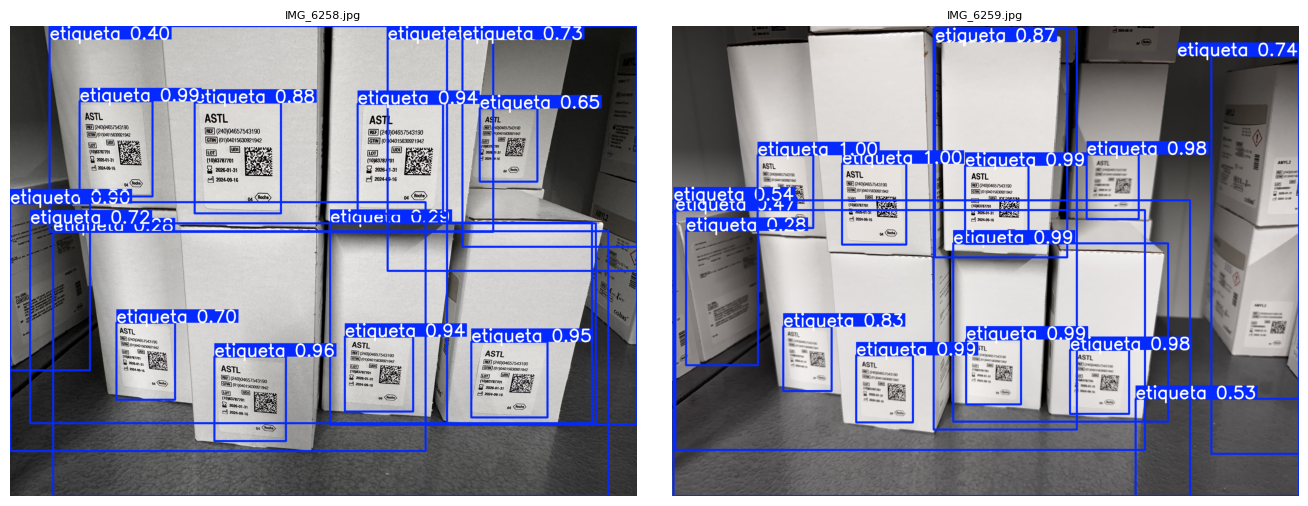

In [ ]:


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Ruta donde se guardaron las imágenes predichas
carpeta_resultados = 'runs/detect/predict'
imagenes = sorted([f for f in os.listdir(carpeta_resultados) if f.endswith(('.jpg', '.png'))])[75:77]  # Solo 10 primeras

# Parámetros de visualización
imagenes_por_fila = 3
total_imagenes = len(imagenes)
filas = (total_imagenes + imagenes_por_fila - 1) // imagenes_por_fila

plt.figure(figsize=(20, 5 * filas))

for i, nombre in enumerate(imagenes):
    ruta = os.path.join(carpeta_resultados, nombre)
    img = mpimg.imread(ruta)
    plt.subplot(filas, imagenes_por_fila, i + 1)
    plt.imshow(img)
    plt.title(nombre, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

